In [50]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/jiax2/Teams/Playground/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [4]:
df

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
0,apple iphone 11,iphone 11,128gb,black,111,2021-06-28,6,2021,2021-06-01
1,apple iphone 11,iphone 11,128gb,black,319,2021-07-05,7,2021,2021-07-01
2,apple iphone 11,iphone 11,128gb,black,320,2021-07-12,7,2021,2021-07-01
3,apple iphone 11,iphone 11,128gb,black,305,2021-07-19,7,2021,2021-07-01
4,apple iphone 11,iphone 11,128gb,black,269,2021-07-26,7,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...
17874,apple iphone xs max,iphone x,64gb,silver,18,2023-01-16,1,2023,2023-01-01
17875,apple iphone xs max,iphone x,64gb,silver,19,2023-01-23,1,2023,2023-01-01
17876,apple iphone xs max,iphone x,64gb,silver,14,2023-01-30,1,2023,2023-01-01
17877,apple iphone xs max,iphone x,64gb,silver,13,2023-02-06,2,2023,2023-02-01


In [5]:
iphone12_df = df[df['phone_generation'] == 'iphone 12']
iphone12_df

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
3027,apple iphone 12,iphone 12,128gb,black,14,2021-08-02,8,2021,2021-08-01
3028,apple iphone 12,iphone 12,128gb,black,43,2021-08-09,8,2021,2021-08-01
3029,apple iphone 12,iphone 12,128gb,black,57,2021-08-16,8,2021,2021-08-01
3030,apple iphone 12,iphone 12,128gb,black,65,2021-08-23,8,2021,2021-08-01
3031,apple iphone 12,iphone 12,128gb,black,59,2021-08-30,8,2021,2021-08-01
...,...,...,...,...,...,...,...,...,...
6241,apple iphone 12 pro max,iphone 12,512gb,silver,7,2023-01-09,1,2023,2023-01-01
6242,apple iphone 12 pro max,iphone 12,512gb,silver,9,2023-01-16,1,2023,2023-01-01
6243,apple iphone 12 pro max,iphone 12,512gb,silver,5,2023-01-23,1,2023,2023-01-01
6244,apple iphone 12 pro max,iphone 12,512gb,silver,8,2023-01-30,1,2023,2023-01-01


In [6]:
iphone12_df = iphone12_df[['weeks_monday', 'claim']]
iphone12_df

,weeks_monday,claim
3027,2021-08-02,14
3028,2021-08-09,43
3029,2021-08-16,57
3030,2021-08-23,65
3031,2021-08-30,59
...,...,...
6241,2023-01-09,7
6242,2023-01-16,9
6243,2023-01-23,5
6244,2023-01-30,8


In [7]:
iphone12_df = iphone12_df.groupby(['weeks_monday'])['claim'].sum().reset_index()
iphone12_df = iphone12_df.sort_values(by='weeks_monday')
iphone12_df

,weeks_monday,claim
0,2021-06-28,422
1,2021-07-05,1017
2,2021-07-12,1045
3,2021-07-19,1144
4,2021-07-26,1157
...,...,...
81,2023-01-16,4277
82,2023-01-23,4136
83,2023-01-30,3764
84,2023-02-06,4604


In [8]:
iphone12_timeshift = iphone12_df.copy(deep = True)
iphone12_timeshift['1_week_ago'] = iphone12_timeshift['claim'].shift(1)
iphone12_timeshift['2_week_ago'] = iphone12_timeshift['1_week_ago'].shift(1)
iphone12_timeshift['3_week_ago'] = iphone12_timeshift['2_week_ago'].shift(1)
iphone12_timeshift = iphone12_timeshift.rename(columns={'claim': 'this_week'})
iphone12_timeshift = iphone12_timeshift.drop(iphone12_timeshift.columns[0], axis=1)
iphone12_timeshift = iphone12_timeshift.dropna()
iphone12_timeshift = iphone12_timeshift.reset_index(drop=True)
iphone12_timeshift

,this_week,1_week_ago,2_week_ago,3_week_ago
0,1144,1045.0,1017.0,422.0
1,1157,1144.0,1045.0,1017.0
2,1212,1157.0,1144.0,1045.0
3,1363,1212.0,1157.0,1144.0
4,1362,1363.0,1212.0,1157.0
...,...,...,...,...
78,4277,3959.0,4189.0,3959.0
79,4136,4277.0,3959.0,4189.0
80,3764,4136.0,4277.0,3959.0
81,4604,3764.0,4136.0,4277.0


In [56]:
# last row looks abnormally low so let's drop it
iphone12_timeshift = iphone12_timeshift.drop(iphone12_timeshift.index[-1])
iphone12_timeshift

,this_week,1_week_ago,2_week_ago,3_week_ago
0,1144,1045.0,1017.0,422.0
1,1157,1144.0,1045.0,1017.0
2,1212,1157.0,1144.0,1045.0
3,1363,1212.0,1157.0,1144.0
4,1362,1363.0,1212.0,1157.0
...,...,...,...,...
77,3959,4189.0,3959.0,3299.0
78,4277,3959.0,4189.0,3959.0
79,4136,4277.0,3959.0,4189.0
80,3764,4136.0,4277.0,3959.0


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [57]:
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators = 100, max_features = 3, random_state = 42)

In [58]:
x1, x2, x3, y = iphone12_timeshift['1_week_ago'], iphone12_timeshift['2_week_ago'], iphone12_timeshift['3_week_ago'], iphone12_timeshift['this_week']
x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1, x2, x3, y = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), y.reshape(-1, 1)
final_x = np.concatenate((x1, x2, x3), axis = 1)

In [43]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = final_x[:-20], final_x[-20:], y[:-20], y[-20:]

In [71]:
rf_model.fit(X_train, y_train)
lin_model.fit(X_train, y_train)

C:\Users\jiax2\AppData\Local\Temp\ipykernel_15452\3222970168.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


LinearRegression()

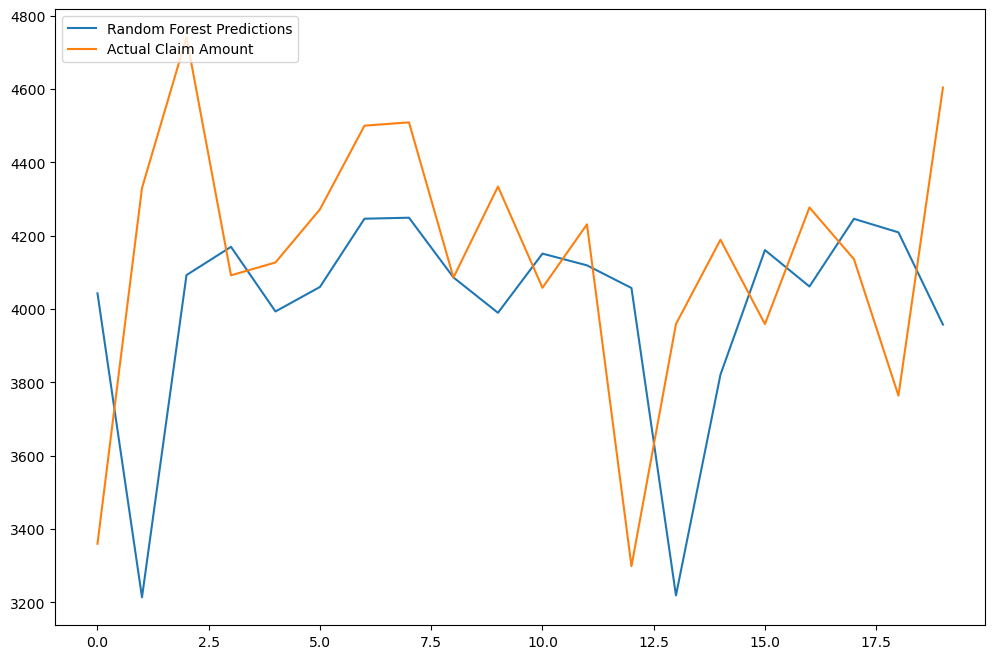

In [72]:
pred = rf_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = "Random Forest Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

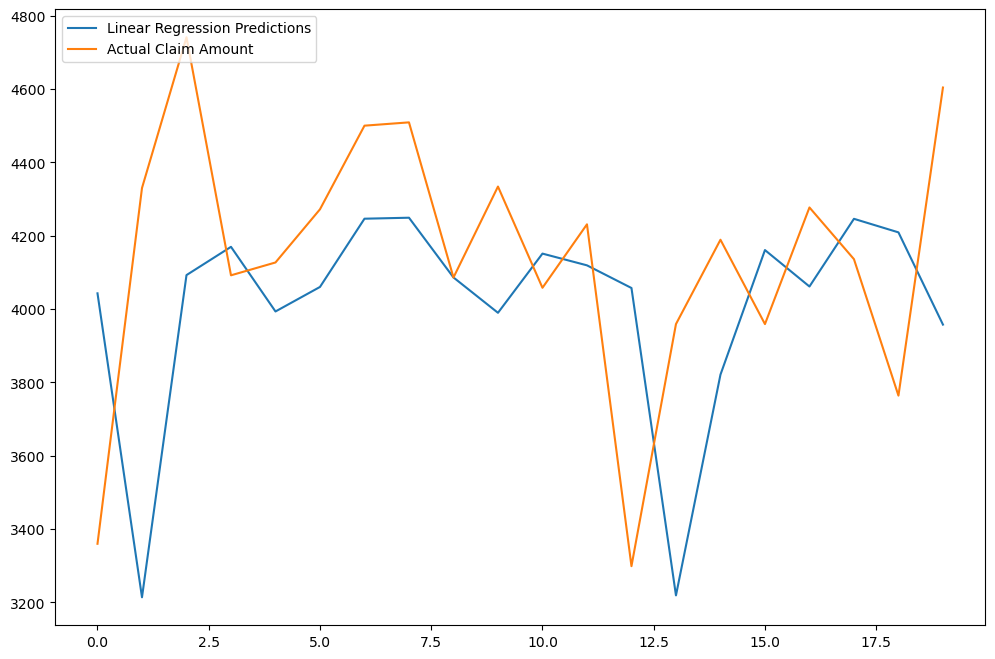

In [73]:
lin_pred = lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred, label = "Linear Regression Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
rmse_rf = sqrt(mean_squared_error(lin_pred, y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred, y_test))
print("Mean sqaured error for Random Forest model is: ", rmse_rf)
print("Mean sqaured error for Linear Regression model is: ", rmse_lr)

Mean sqaured error for Random Forest model is:  472.91963127866615
Mean sqaured error for Linear Regression model is:  472.91963127866615


### Looks like random forest and linear regression have the same mean squared error 